In [39]:
## imports
#%matplotlib qt
#%matplotlib notebook 
#%matplotlib widget
%matplotlib inline 

# on Rusty use python3/3.7.3 kernel

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import matplotlib
from matplotlib import cm
import h5py
from math import pi, sqrt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
rc('text', usetex=True)
import seaborn as sns
from os import path

from plotly.tools import mpl_to_plotly 

## Import our methods 
from ProcessGeodesics import GetGeodesicTrajectory, GetGeodesicIndices, \
    GetGeodesicsXTurnsIndices, GetGeodesicsXTurnsIndicesGreater, \
    GetTime, GetCameraPosition, GetCameraData, GrabSurfaceIndices

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


## Plot geodesic trajectories

In [58]:
## Plot geodesic trajectories
def PlotGetTrajectoriesFromH5(p):

    Indices = GetGeodesicIndices(p, infinity=False)
    print(len(Indices))
    
    Indices = Indices[::100]  # chose the number of geodesics you want to plot
    print(Indices)
    
    cs = sns.color_palette('Paired', n_colors=len(Indices))
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    for n, color in zip(Indices, cs):
        t, x, y, z = GetGeodesicTrajectory(p, n)
        ax.plot(x, y, z, '-', lw = 2.0, label = n, color = color)
        #print(x[0], y[0], z[0])
                
    ax.set_xlabel('x/M',labelpad=20)
    ax.set_ylabel('y/M', labelpad=20)
    ax.set_zlabel('z/M', labelpad=20)
    
    lim = 20.0
    #ax.set_xlim(-lim, lim)
    #ax.set_ylim(-lim, lim)
    #ax.set_zlim(-lim, lim)
    
    # Plot BH
    #ax.scatter([0], [0], [0], s = 1000, color = 'black')
    # draw sphere
    R = 2. # R_s
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j] # change xj to improve resolution 
    x = R*np.cos(u)*np.sin(v)
    y = R*np.sin(u)*np.sin(v)
    z = R*np.cos(v)
    ax.plot_wireframe(x, y, z, color="k", alpha = 0.7, linewidth = .5)
    
    # Plot Camera
    ax.scatter([0], [0], [10], s = 100, color = 'blue')
    
    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.4
    #ax.set_axis_off()
    

    #plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    return fig, ax
    


In [59]:
p = '/mnt/ceph/users/ledmond/KerrGeodesics/Kerr'
p

'/mnt/ceph/users/ledmond/KerrGeodesics/Kerr'

430
[0, 100, 200, 300, 400]


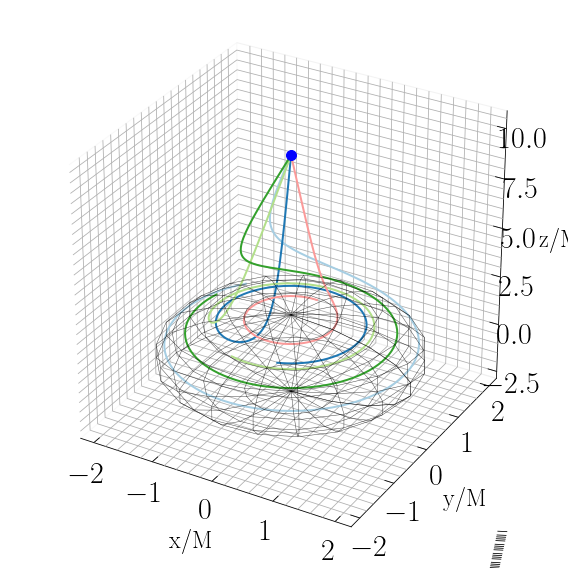

In [60]:
fig, ax = PlotGetTrajectoriesFromH5(p)

In [ ]:
'''plotly_fig = mpl_to_plotly(fig)
plotly_fig'''